# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
from pathlib import Path as path

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "classification"
IMAGES_PATH = path(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
MODELS_DIR = path(PROJECT_ROOT_DIR,'models')
path(IMAGES_PATH, exist_ok=True).mkdir(exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300, overwrite=False):
    path_ = path(IMAGES_PATH, f'{fig_id}.{fig_extension}')
    if path_.exists() and not overwrite:
        print(f'{fig_id}.{fig_extension} already exists in {IMAGES_PATH}')
    else:
        print(f'Saving figure {fig_id} in {IMAGES_PATH}')
        if tight_layout:
            plt.tight_layout()
        plt.savefig(path_, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

data_home = path(f"~/datasets/hands_on_ml2/{CHAPTER_ID}").expanduser()

if not data_home.exists():
    print(f'{data_home} does not exist!')
    mnist = fetch_openml('mnist_784', version=1, data_home=data_home, parser='auto', as_frame=False)
else:
    print('Loading existing data.')
    mnist = fetch_openml(data_home=data_home, data_id='554', parser='auto', as_frame=False)

mnist.keys()

Loading existing data.


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [4]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
pd.Series(y).value_counts().sort_index()

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: count, dtype: int64

In [8]:
y_test = y[60000:]

pd.Series(y_test).value_counts().sort_index()

0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64

In [9]:
X.shape

(70000, 784)

some_digit_plot.png already exists in ../images/classification


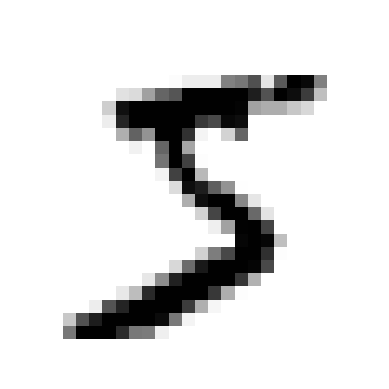

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [11]:
y[0]

'5'

In [12]:
# from string to intiger
y = y.astype(np.uint8)

In [13]:
# function that plots single digit
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


In [14]:

# plot multiple digits

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    

more_digits_plot.png already exists in ../images/classification


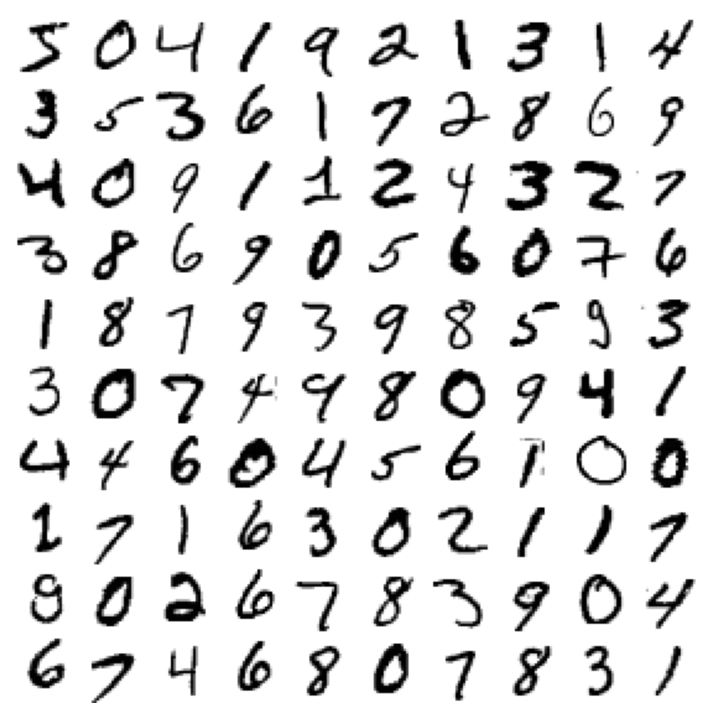

In [15]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [16]:
# data is already split for us so all we need to do is allocate it to the train and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

##### We want to be able to identify if a digit is a 5 or not

In [17]:
y_train_5 = (y_train == 5) # all 5s evaluate to True
y_test_5 = (y_test == 5)

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state= 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.coef_.shape

(1, 784)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

##### The result above shows that "some_digit" is actually a 5 --> Below is the proof

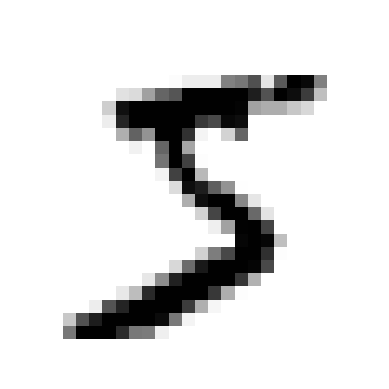

In [21]:
plot_digit(some_digit)

In [22]:
sgd_clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

##### What is score?

In [23]:
sgd_clf.score(X[0:5],y[0:5]) # mean accuracu of our model

0.2

# Performance Measures

##### Measuring accuracy using Cross-Validation

In [24]:
# Custom implementation of the cross validation method in sklearn 
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) #Shuffle omitted in book by mistake 

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [25]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train,y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [26]:
# But let's see how a dumb classifier performs when it classifies
# everything as not 5

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

The above makes sense as we expect roughly 90% of the digits to be not a 5.
We can conclude that accuracy is not always the best metric to evaluate the
performance of classifier models, especially when dealing with skewed datasets.

##### Confusion Matrix

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [30]:
# this is what a perfect prediction would look like

y_train_perfect_pred = y_train_5

cm_pretend = confusion_matrix(y_train_5, y_train_perfect_pred)

cm_pretend

array([[54579,     0],
       [    0,  5421]])

##### Precision, Recall

In [38]:
from sklearn.metrics import precision_score, recall_score

precision_score_value = precision_score(y_train_pred,y_train_5)
print(f'Precision: {precision_score_value}')
recall_score_value = recall_score(y_train_pred,y_train_5)
print(f'Recall: {recall_score_value}')

Precision: 0.6511713705958311
Recall: 0.8370879772350012


According to the above, precision is 83% which means that of all the poisitively identified
samples only 65% were identified correct.

A recall of 83% means that of all the positive samples only 83% of them were identified correctly

In [32]:
print('''
          Prediction
       -----------------
      |   TN   |   FP   |
Actual -----------------
      |   FN   |   TP   |
       -----------------

C_{0,0} --> TN  
C_{1,0} --> FN  
C_{0,1} --> FP  
C_{1,1} --> TP  

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

''')


          Prediction
       -----------------
      |   TN   |   FP   |
Actual -----------------
      |   FN   |   TP   |
       -----------------

C_{0,0} --> TN  
C_{1,0} --> FN  
C_{0,1} --> FP  
C_{1,1} --> TP  

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)




In [33]:
index = ['Negative','Positive']

cm_df = pd.DataFrame(cm,columns=index, index=index)

cm_df

,Negative,Positive
Negative,53892,687
Positive,1891,3530


In [34]:
# another way to calculate percision is
# TP/TP+FP
f'Precision: {cm[1,1]/(cm[1,1]+cm[1,0])}'

'Precision: 0.6511713705958311'

In [35]:
# another way to calculate recall is
# TP/TP+FN
f'Recall: {cm[1,1]/(cm[1,1]+cm[0,1])}'

'Recall: 0.8370879772350012'

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train_pred,y_train_5)

0.7325171197343846

In [42]:
manual_f1_score = ((2*precision_score_value*recall_score_value)/(recall_score_value+precision_score_value))
manual_f1_score

0.7325171197343846

In [45]:
from sklearn.metrics import fbeta_score
fbeta_score(y_train_pred,y_train_5,beta=2)

0.7918704293597739

In [48]:
beta=2
manual_fbeta_score = (((1+beta**2)*precision_score_value*recall_score_value)/(recall_score_value+(beta**2)*precision_score_value))
manual_fbeta_score


0.7918704293597739

In [50]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

for the first digit that we know is a 5 the decision function returns a score of 2164 which is higher than the default threshold of 0 which in turns returns True, hence classifying our first digit as a 5

In [52]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [54]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

precision_recall_vs_threshold_plot.png already exists in ../images/classification


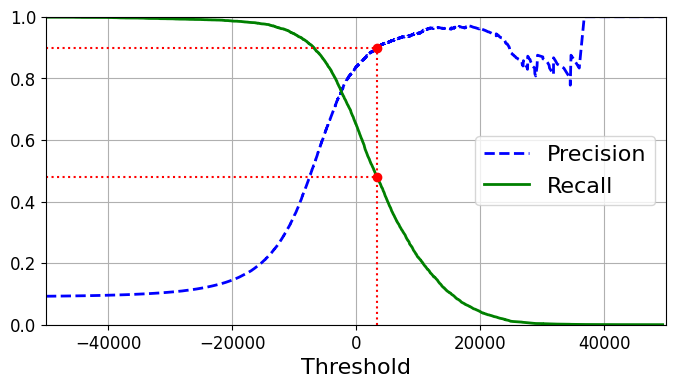

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Vertical line     # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Horizontal line   # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Horizontal line   # Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Single dot        # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Single dot        # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [68]:
(y_train_pred == (y_scores>0)).all()

True

all values predicted as true are above the threshold of 0

Saving figure precision_vs_recall_plot in ../images/classification


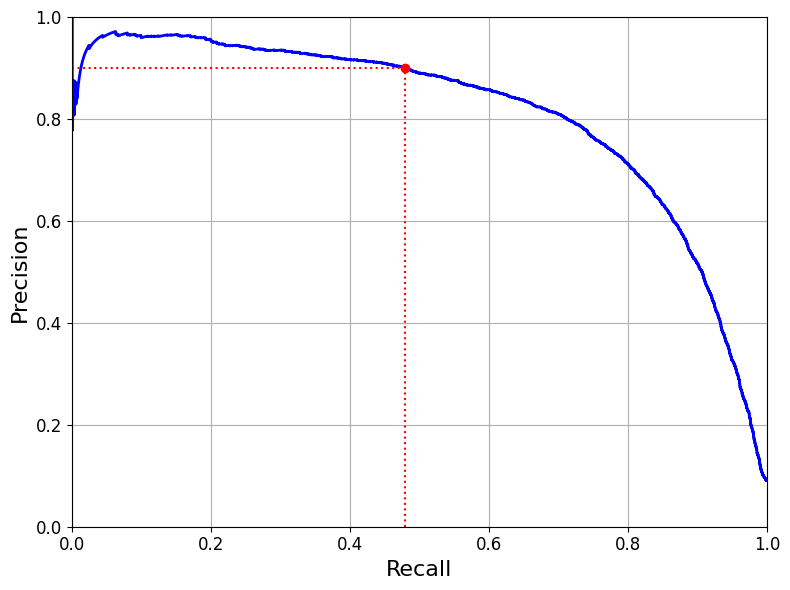

In [69]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [63]:
recall_90_precision

0.4799852425751706

In [64]:
threshold_90_precision

3370.0194991439566

In [65]:
# manufacture data with precision set to 90%
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [66]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [67]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

##### The ROC Curve

In [78]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot in ../images/classification


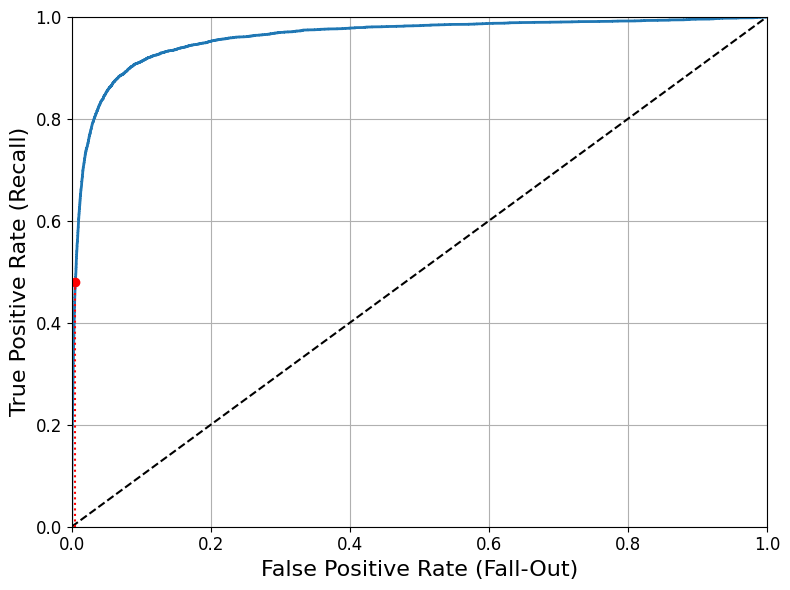

In [79]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

let's compare with a random forest classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [82]:
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [84]:
# get the probability for a positive class i.e. it's a 5
y_scores_forest = y_probas_forest[:,1]

In [86]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [88]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
recall_for_forest

0.9511160302527208

roc_curve_comparison_plot.png already exists in ../images/classification


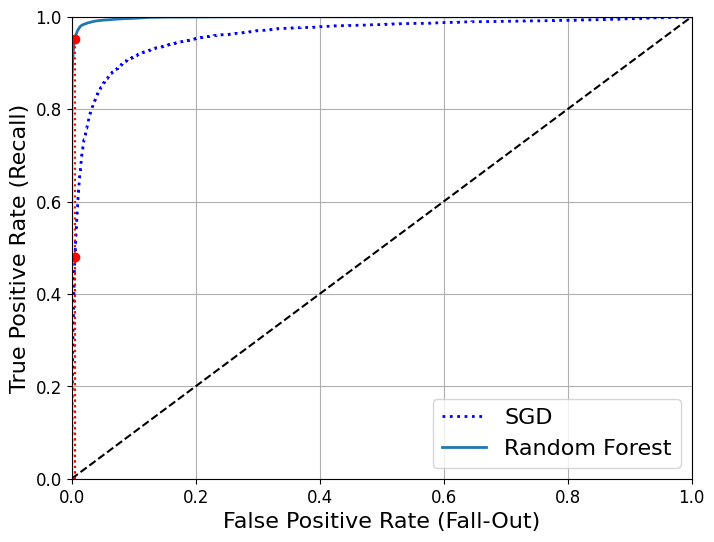

In [102]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [90]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [91]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [94]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591